In [1]:
### Visualization of Figure 2 , S4 and S5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pycirclize import Circos
from io import StringIO
from matplotlib.patches import Patch
import pycountry
import pycirclize.utils
import openpyxl
from Bio import Phylo
from pycirclize.utils import load_example_image_file
import  matplotlib.lines
import matplotlib.lines as mlines
from matplotlib import rcParams

In [2]:
numlistFull = ['Europe','North America','South Americ','Oceania','Asia']
numlist = ['EU', 'NA', 'SA', 'OC', 'AS']
cololist = ['#f768a1','#78c679','#1d91c0','#fe9929','#fc4e2a']
colordict = dict(zip(numlist,cololist))
namelist = dict(zip(numlist,numlistFull))

## Global

In [3]:

# Load the Excel file
attrativeness_continent = pd.read_csv('data/attrativeness_continents.csv')

print(attrativeness_continent.shape)
attrativeness_continent['cohort'] = list(range(0, 12))
attrativeness_continent.head()

(12, 6)


,Unnamed: 0,SA,EU,OC,AS,NA,cohort
0,1960-1964,0.012884,0.442022,0.104063,0.129832,0.311199,0
1,1965-1969,0.011268,0.435681,0.115962,0.141784,0.295305,1
2,1970-1974,0.016469,0.447247,0.116315,0.141534,0.278435,2
3,1975-1979,0.015596,0.449455,0.118189,0.141112,0.275648,3
4,1980-1984,0.014366,0.414103,0.095774,0.168323,0.307434,4


In [4]:
figszieAll = (8,4)
markersize = 20
linewidth = 3.5
legend_fontsize = 20
legend_markersize = 10
legend_linewidth = 3
legend_height = 40
legend_width = 60

## Countries

In [5]:
# Load the Excel file
attrativeness_countries = pd.ExcelFile('data/attrativeness_countries.xlsx')

# Get all sheet names
sheet_names = attrativeness_countries.sheet_names

In [6]:
continent = 'AS' #'EU', 'NA', 'SA', 'OC', 'AS'
df = attrativeness_countries.parse(continent)
list(df.columns[1:])

['IN', 'CN', 'JP', 'ID', 'KR', 'IR']

In [7]:
attrativeness_countries.sheet_names

['EU', 'NA', 'SA', 'OC', 'AS']

In [8]:
EUColorlist = ["#d4b9da","#9e9ac8","#c994c7","#df65b0","#e7298a","#ce1256","#980043","#54278f","#3f007d"] ##9
NAColorlist = ["#66c2a4","#006d2c","#00441b"] ##3
SAColorlist = ["#045a8d"]##1
OCColorlist = ["#ec7014"]##1
ASColorlist = ["#feb24c","#e31a1c","#fc9272", "#fb6a4a","#fcbba1","#fdd49e"]##6
ColorDict = {
    'EU':EUColorlist,
    'NA':NAColorlist,
    'SA':SAColorlist,
    'OC':OCColorlist,
    'AS':ASColorlist

}

## City Level

In [9]:
# Load the Excel file
attrativeness_cities = pd.ExcelFile('data/attrativeness_cities.xlsx')

# Get all sheet names
sheet_names = attrativeness_cities.sheet_names
sheet_names

['GB',
 'US',
 'BR',
 'DE',
 'RU',
 'AU',
 'FR',
 'JP',
 'IT',
 'PL',
 'CN',
 'IR',
 'ES',
 'ID',
 'CA',
 'IN',
 'TR',
 'KR',
 'NL',
 'MX']

In [10]:
continent = 'NA' #'EU', 'NA', 'SA', 'OC', 'AS'
df = attrativeness_countries.parse(continent)
colorDDD = dict(zip(list(df.columns[1:]), ColorDict[continent]))

In [11]:
colorDDD['US']

'#006d2c'

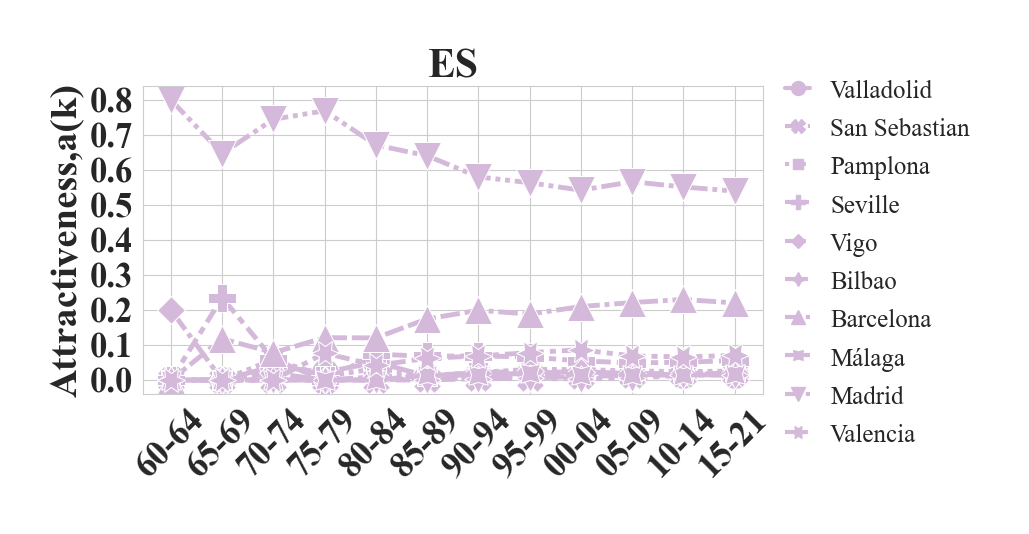

In [20]:
country = 'ES' # 'US', 'IN', 'CN'
continent = 'EU' #'EU', 'NA', 'SA', 'OC', 'AS'
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']  # 可以具体替换
df = attrativeness_countries.parse(continent)
colorDDD = dict(zip(list(df.columns[1:]), ColorDict[continent]))
color = colorDDD[country]

df = attrativeness_cities.parse(country)
df['cohort'] = list(range(0,12))
Draw1 = pd.melt(df, id_vars = 'cohort', value_vars = list(df.columns[1:-1]))

plt.figure(figsize=figszieAll, dpi=100)
sns.lineplot(data=Draw1, x='cohort', y='value', style="variable",
             markers=True, color = color,
             # palette="tab20",
             linewidth=linewidth, markersize=20, legend= True)
plt.ylabel('Attractiveness'+',a(k)', fontsize=28, weight='bold')
plt.xlabel('', fontsize=0, weight='bold')


plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],labels=['60-64','65-69','70-74','75-79','80-84','85-89','90-94','95-99','00-04','05-09','10-14','15-21'],
           fontsize=25, weight='bold',rotation = 45)
plt.yticks( fontsize=25, weight='bold')

plt.title(country, fontsize=30, weight = 'bold')
legend = plt.legend( fontsize = legend_markersize, frameon = True,bbox_to_anchor=(1, 1.1),  ncols = 1, prop = {'size':18})

import matplotlib
# 设置每个缩略图中线段或点的大小为20
for handle in legend.legendHandles:
    if isinstance(handle, matplotlib.lines.Line2D):
        handle.set_markersize(legend_markersize)
        handle.set_linewidth(legend_linewidth)
        handle.set_color(color)
        # handle.set(20)
    elif isinstance(handle, matplotlib.patches.Patch):
        handle.set_height(legend_height)
        handle.set_width(legend_width)
        handle.set_color(color)
    # elif isinstance(handle, Line2D):



# 显示绘制结果
plt.show()
